<h1>Importing Required Libraries</h1>

In [186]:
# Importing Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<h1>Loading Dataset</h1>

In [143]:
# Loading Dataset
df=pd.read_csv(r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 4\Day 2\framingham.csv')
print("Dataset:\n",df.head(10))

Dataset:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0

<h1>Hitogram for Numeric Features</h1>

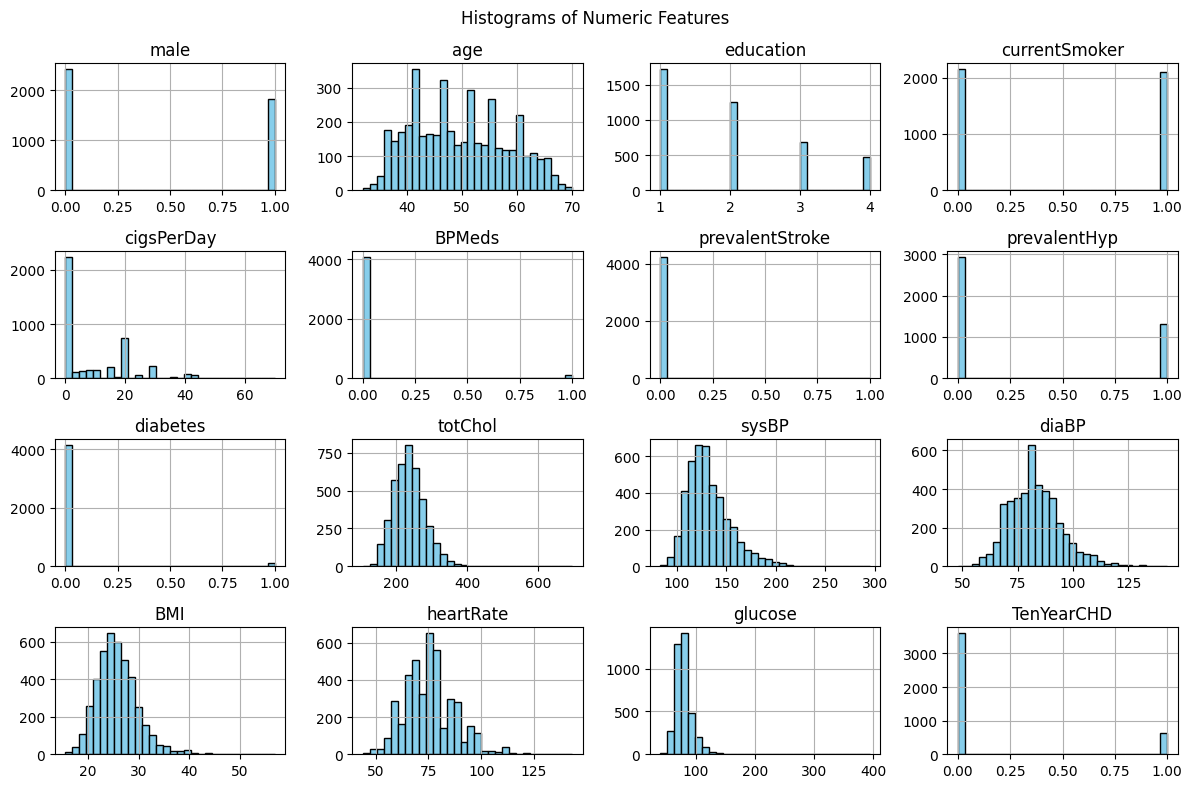

In [144]:
# Histogram for numeric features
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

<h1>Checking Missing Values</h1>

In [145]:
# Show total missing values per column
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


<h1> Filling Missing Values</h1>

In [146]:
# Average
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

# Most Frequent
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

<h1>Checking & Dropping Duplicated Values</h1>

In [147]:
# Duplicate rows
print(df[df.duplicated()])
df = df.drop_duplicates()

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


<h1>Checking & Removing NAN Values</h1>

In [148]:
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [149]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

<h1>Reseting Index of Dataset</h1>

In [150]:
#Reset indexing after cleaning
df = df.reset_index(drop=True)

In [151]:
print("Preprocessed Dataset : \n",df.head(30))

Preprocessed Dataset : 
     male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39        4.0              0         0.0     0.0                0   
1      0   46        2.0              0         0.0     0.0                0   
2      1   48        1.0              1        20.0     0.0                0   
3      0   61        3.0              1        30.0     0.0                0   
4      0   46        3.0              1        23.0     0.0                0   
5      0   43        2.0              0         0.0     0.0                0   
6      0   63        1.0              0         0.0     0.0                0   
7      0   45        2.0              1        20.0     0.0                0   
8      1   52        1.0              0         0.0     0.0                0   
9      1   43        1.0              1        30.0     0.0                0   
10     0   50        1.0              0         0.0     0.0                0   
11     0   43  

In [152]:
# number of Rows and Columns
rows,cols=df.shape
print("Rows : ",rows)
print("Columns : ",cols)

Rows :  4240
Columns :  16


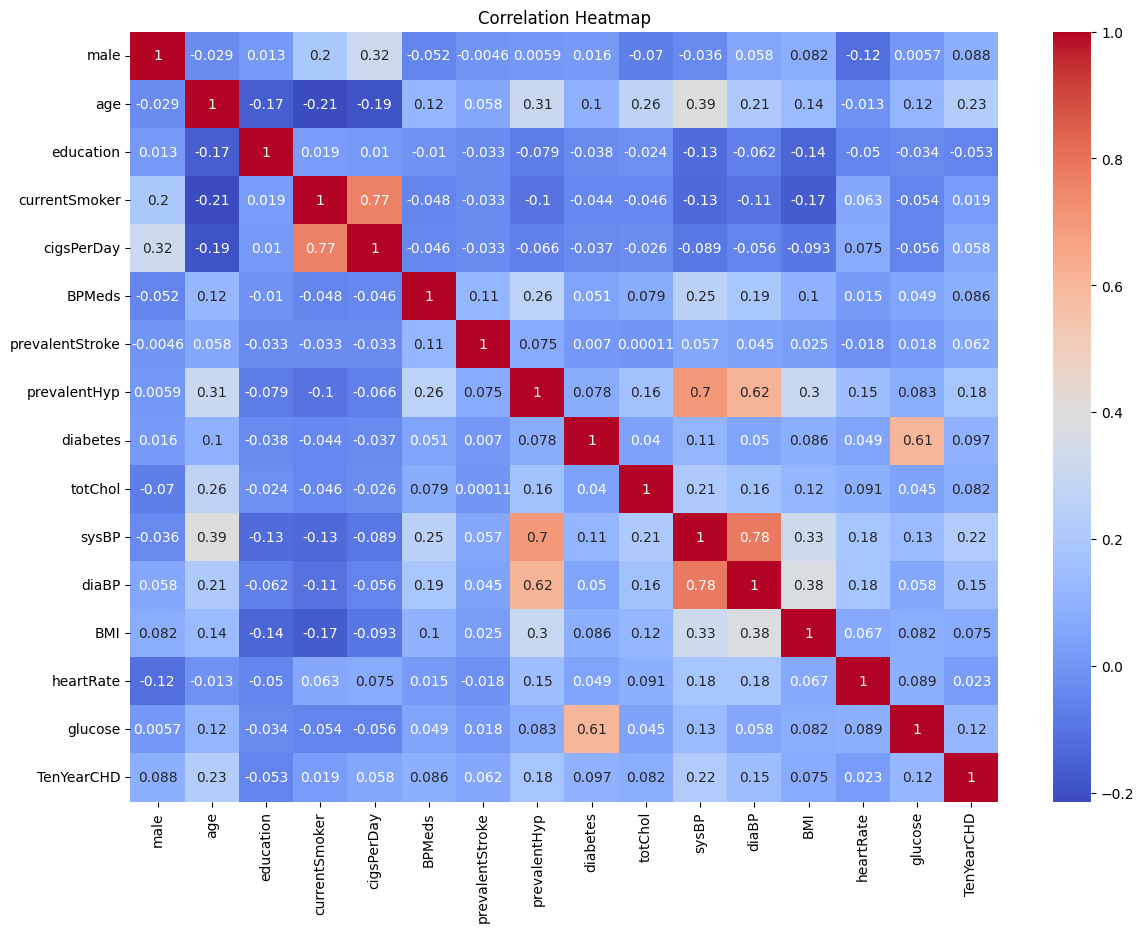

In [153]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h1> Splitting dataset into Features and target</h1>

In [154]:
# Splitting data into X & Y
X=df.drop("TenYearCHD",axis=1)
Y=df['TenYearCHD']

<h1>Splitting dataset for Training & Testing</h1>

In [155]:
# Splitting data for Training and Testing
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.3)

<h1>Loading Logistic Regression Model</h1>

In [156]:
model1 = LogisticRegression(solver='saga',class_weight='balanced')
model1.fit(X_Train,Y_Train)
Y_Predict1=model1.predict(X_Test)
accuracy1 = accuracy_score(Y_Test, Y_Predict1)
print("LogisticREgression Model Accuracy : ",accuracy1)

LogisticREgression Model Accuracy :  0.6226415094339622


C:\Users\Doctor Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<h1>Loading RandomForestClassifier</h1>

In [183]:
model2=RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model2.fit(X_Train,Y_Train)
Y_Predict2=model2.predict(X_Test)
accuracy2 = accuracy_score(Y_Test, Y_Predict2)
print("RandomForestClassifier Model Accuracy : ",accuracy2)

RandomForestClassifier Model Accuracy :  0.8545597484276729


<h1>Comparison Accuries</h1>

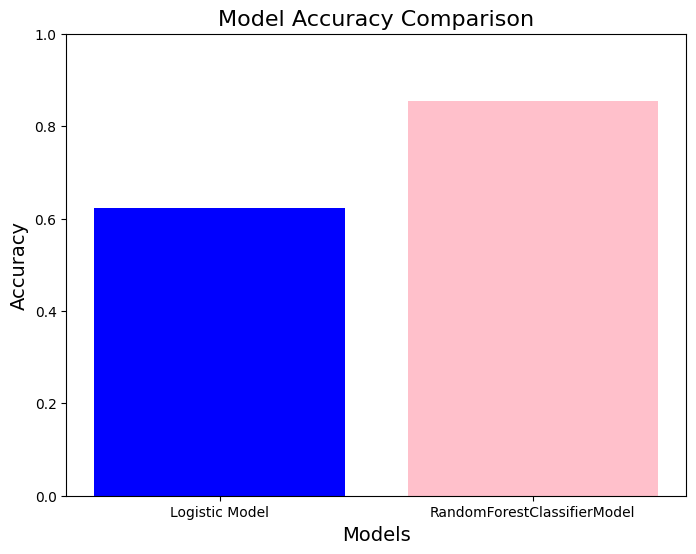

In [185]:
# Labels for the models
models = ['Logistic Model', 'RandomForestClassifierModel']
# Accuracy values
accuracies = [accuracy1, accuracy2]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'pink'])

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.show()

<h1>Confusion Matrix</h1>

In [179]:
matrix1 = confusion_matrix(Y_Test, Y_Predict1)
matrix2 = confusion_matrix(Y_Test, Y_Predict2)

print("Logistic Regression Model Confudion Matrix : \n",matrix1)
print("RandomForest Classifier Model Confudion Matrix : \n",matrix2)

Logistic Regression Model Confudion Matrix : 
 [[676 409]
 [ 71 116]]
RandomForest Classifier Model Confudion Matrix : 
 [[1083    2]
 [ 183    4]]


<h1>Saving Model</h1>

In [171]:
joblib.dump(model, r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 4\Day 2\LogisticRegression_Model.pkl')
print(">>>LogisticREgression Model is saved successfully<<<")

>>>LogisticREgression Model is saved successfully<<<


In [172]:
joblib.dump(model, r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 4\Day 2\RandomForestClassifier.pkl')
print(">>>RandomForestClassifier Model is saved successfully<<<")

>>>RandomForestClassifier Model is saved successfully<<<


<h1>Loading Model<h1>

In [173]:
LogisticRegressionModel = joblib.load(r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 4\Day 2\LogisticRegression_Model.pkl')
print("Logistic Regression Model Loaded Successfully")

Logistic Regression Model Loaded Successfully


In [174]:
RandomForestClassifier = joblib.load(r'C:\Users\Doctor Computers\Desktop\Machine Learning 1\Week 4\Day 2\RandomForestClassifier.pkl')
print("RandomForestClassifier Model Loaded Successfully")

RandomForestClassifier Model Loaded Successfully


<h1>Making Predictions</h1>

In [175]:
'''
data1 = [1, 40, 2, 1, 20, 0, 0, 0, 0, 200, 70, 30.3, 80, 99, 76]
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
           'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
           'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df1 = pd.DataFrame([data], columns=columns)
'''

data2 = [1, 68, 1, 1, 30, 1, 1, 1, 1, 340, 180, 110, 36.5, 120, 220]
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
           'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
           'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df2 = pd.DataFrame([data2], columns=columns)


Prediction1=LogisticRegressionModel.predict(df2)
print("Logitic Regression Model Prediction ::",Prediction1)

Prediction2=RandomForestClassifier.predict(df2)
print("RandomForestClassifier Model Prediction ::",Prediction2)

Logitic Regression Model Prediction :: [0]
RandomForestClassifier Model Prediction :: [0]
